# Spring 2023 : CS5720
### Neural Networks & Deep Learning ICP_9 : Jahnavi Chadalavada (700728443)

#**Autoencoder**

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# input layer
input_img = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(256, activation='relu')(input_img)
encode_layer2 = Dense(128, activation='relu')(encode_layer1)
encode_layer3 = Dense(64, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(32, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(64, activation='relu')(latent_view)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)
decode_layer3 = Dense(256, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_img, output_layer)

In [2]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

history=model.fit(x_train, x_train,epochs=10,batch_size=256, shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 9s 28ms/step - loss: 0.0535 - accuracy: 0.0081 - val_loss: 0.0279 - val_accuracy: 0.0146
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0253 - accuracy: 0.0110 - val_loss: 0.0237 - val_accuracy: 0.0141
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0224 - accuracy: 0.0124 - val_loss: 0.0215 - val_accuracy: 0.0136
Epoch 4/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0206 - accuracy: 0.0136 - val_loss: 0.0201 - val_accuracy: 0.0139
Epoch 5/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0194 - accuracy: 0.0156 - val_loss: 0.0191 - val_accuracy: 0.0152
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0185 - accuracy: 0.0161 - val_loss: 0.0182 - val_accuracy: 0.0141
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0178 - accuracy: 0.0171 - val_loss: 0.0176 - val_accuracy: 0.0185

In [4]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


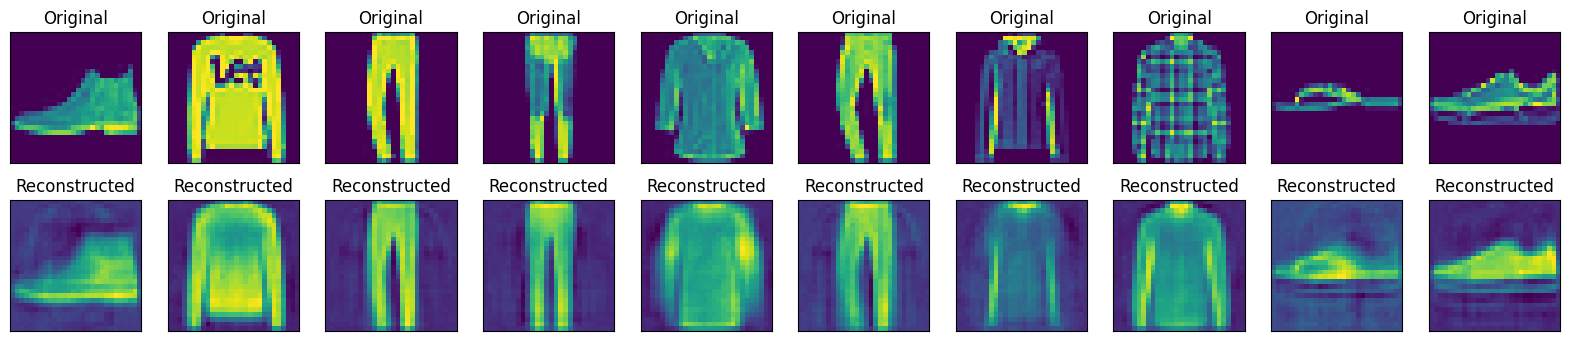

In [5]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

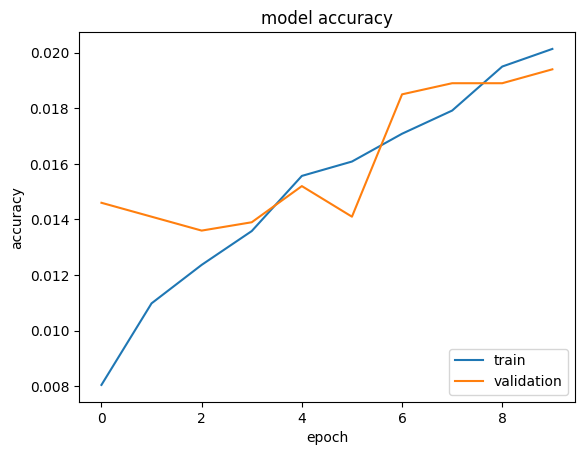

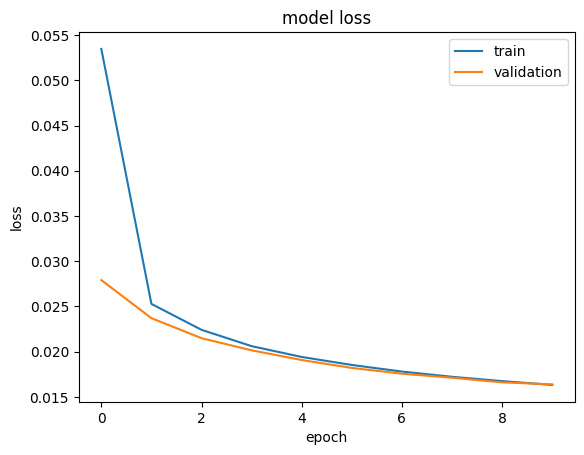

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#**Denoisening Autoencoder**

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# input layer
input_img = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(256, activation='relu')(input_img)
encode_layer2 = Dense(128, activation='relu')(encode_layer1)
encode_layer3 = Dense(64, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(32, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(64, activation='relu')(latent_view)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)
decode_layer3 = Dense(256, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_img, output_layer)


In [8]:
model.compile(optimizer='adadelta', loss='mse',metrics=['accuracy'])

from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [9]:

model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

history=model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 5s 15ms/step - loss: 0.0537 - accuracy: 0.0067 - val_loss: 0.0309 - val_accuracy: 0.0088
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0273 - accuracy: 0.0128 - val_loss: 0.0256 - val_accuracy: 0.0128
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0245 - accuracy: 0.0138 - val_loss: 0.0240 - val_accuracy: 0.0136
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0230 - accuracy: 0.0139 - val_loss: 0.0228 - val_accuracy: 0.0152
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0220 - accuracy: 0.0144 - val_loss: 0.0220 - val_accuracy: 0.0157
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0212 - accuracy: 0.0154 - val_loss: 0.0214 - val_accuracy: 0.0158
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0205 - accuracy: 0.0154 - val_loss: 0.0211 - val_accuracy: 0.0167

In [10]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


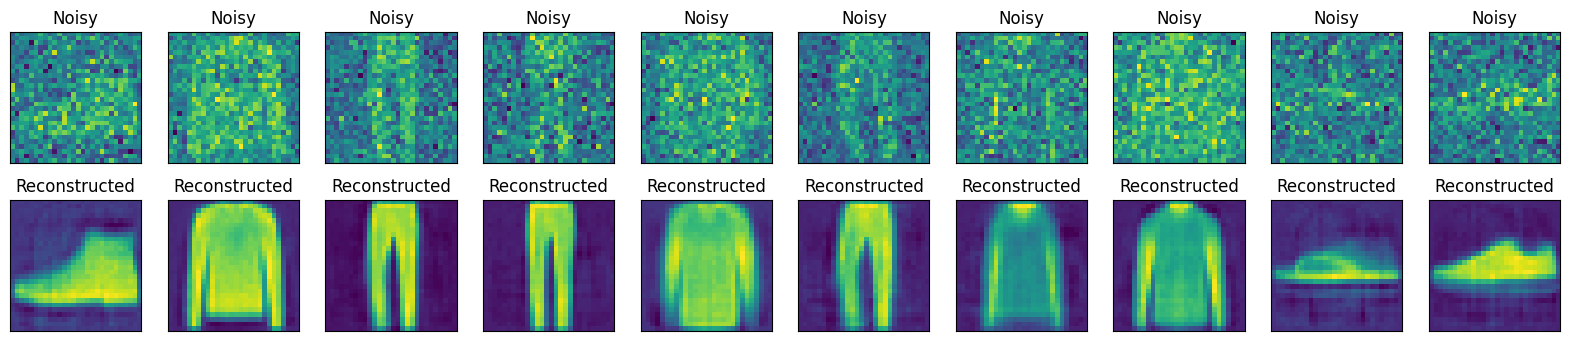

In [11]:

import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("Noisy")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

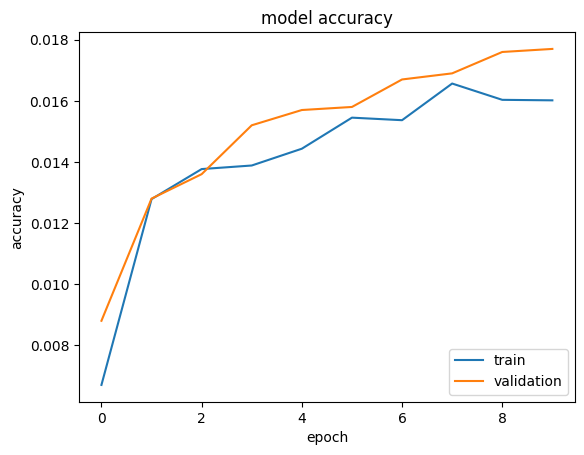

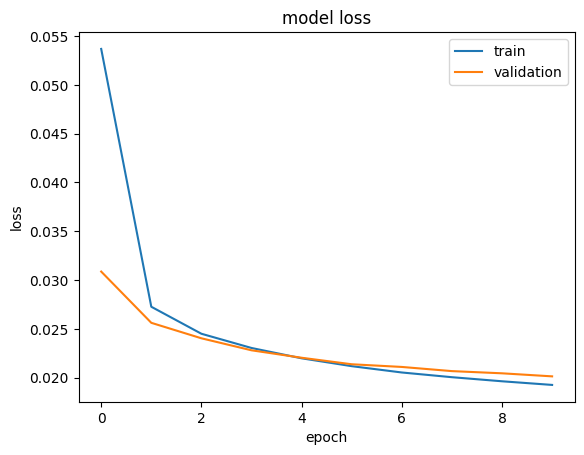

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()